In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
from google.colab import drive
drive.mount('/content/drive')
churn_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Churn_Modelling.csv")

# Display initial information
print("Initial Data Preview:")
print(churn_data.head())

Mounted at /content/drive
Initial Data Preview:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57     

In [3]:
# Remove duplicate entries
churn_data = churn_data.drop_duplicates()

# Show dataset shape after removing duplicates
print("\nData Shape After Removing Duplicates:", churn_data.shape)


Data Shape After Removing Duplicates: (10000, 14)



Exited Value Counts:
Exited
0    7963
1    2037
Name: count, dtype: int64


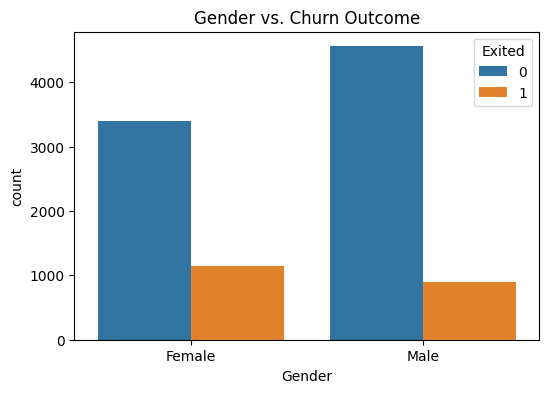

In [4]:
# Display class distribution for the target
print("\nExited Value Counts:")
print(churn_data['Exited'].value_counts())

# Visualize gender distribution by churn outcome
plt.figure(figsize=(6,4))
sns.countplot(data=churn_data, x='Gender', hue='Exited')
plt.title("Gender vs. Churn Outcome")
plt.show()

In [5]:
# Drop unneeded identifier column
churn_data.drop(columns=['CustomerId'], inplace=True)
print("\nShape After Dropping CustomerId:", churn_data.shape)

# Encode categorical features
from sklearn.preprocessing import LabelEncoder
labeler = LabelEncoder()
for feature in churn_data.columns:
    if churn_data[feature].dtype == object:
        churn_data[feature] = labeler.fit_transform(churn_data[feature])

# Separate features and target
features = churn_data.drop(columns=['Exited'])
target = churn_data['Exited']



Shape After Dropping CustomerId: (10000, 13)


In [6]:
# Standardize feature values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, target, test_size=0.2, random_state=1
)
print("\nTraining Data Shape:", X_train.shape)


Training Data Shape: (8000, 12)


In [7]:
# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = classifier.predict(X_test)
accuracy = classifier.score(X_test, y_test)
print("\nTest Accuracy:", accuracy)



Test Accuracy: 0.8035


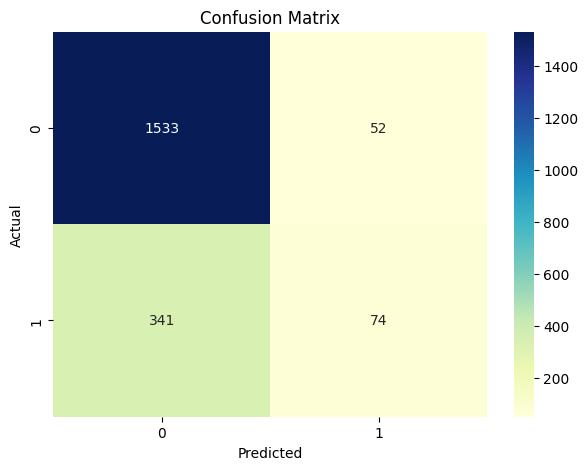


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1585
           1       0.59      0.18      0.27       415

    accuracy                           0.80      2000
   macro avg       0.70      0.57      0.58      2000
weighted avg       0.77      0.80      0.76      2000



In [8]:
# Confusion matrix visualization
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
